In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Building RFM Analytical Model

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Clean data set

In [3]:
dataset_path = '/content/drive/MyDrive/Customer_Segmentation_Project/Data/Gold Layer/uk_data.csv'
uk_data = pd.read_csv(dataset_path, encoding='ISO-8859-1')
uk_data.head(20)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Year,Month,WeekDay,Quarter,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00,2010,12,2,4,8,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00,2010,12,2,4,8,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010-12-01,08:34:00,2010,12,2,4,8,54.08


In [4]:
#converting date column to date (as a check)
uk_data['Date'] = pd.to_datetime(uk_data['Date'])

# Taking a reference date
reference_date = uk_data['Date'].max()

# Calculate Recency, Frequency, and Monetary values for each customer by using group by
rfm_df = uk_data.groupby('CustomerID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'Revenue': 'sum'                                    # Monetary
}).reset_index()


rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,0,210,33053.19
3,12749.0,3,5,4090.88
4,12820.0,3,4,942.34


In [5]:


rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,4.246111,1857.950687
std,1576.823683,99.528532,7.205750,7477.736186
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,1.000000,298.110000
50%,15569.000000,50.000000,2.000000,644.300000
75%,16913.000000,142.000000,5.000000,1570.810000
max,18287.000000,373.000000,210.000000,259657.300000


In [6]:

rfm_df['R_Score'] = pd.cut(rfm_df['Recency'], bins=[-1, rfm_df['Recency'].quantile(0.2), rfm_df['Recency'].quantile(0.4), rfm_df['Recency'].quantile(0.6), rfm_df['Recency'].quantile(0.8), rfm_df['Recency'].max()], labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=[-1, rfm_df['Frequency'].quantile(0.2), rfm_df['Frequency'].quantile(0.4), rfm_df['Frequency'].quantile(0.6), rfm_df['Frequency'].quantile(0.8), rfm_df['Frequency'].max()], labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'], bins=[-1, rfm_df['Monetary'].quantile(0.2), rfm_df['Monetary'].quantile(0.4), rfm_df['Monetary'].quantile(0.6), rfm_df['Monetary'].quantile(0.8), rfm_df['Monetary'].max()], labels=[1, 2, 3, 4, 5])

# Calculate overall RFM Score by concatenating R, F, M scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the RFM table with scores
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12747.0,2,11,4196.01,5,5,5,555
2,12748.0,0,210,33053.19,5,5,5,555
3,12749.0,3,5,4090.88,5,4,5,545
4,12820.0,3,4,942.34,5,4,4,544


In [7]:
# Define function to categorize customers based on RFM scores
def rfm_segment(row):
    if row['RFM_Score'] == '555':
        return 'Champion'
    elif int(row['R_Score']) >= 4 and int(row['F_Score']) >= 3 and int(row['M_Score']) >= 3:
        return 'Loyal Customer'
    elif int(row['R_Score']) >= 4 and int(row['F_Score']) >= 3 and int(row['M_Score']) <= 2:
        return 'Potential Loyalist'
    elif int(row['R_Score']) >= 4 and int(row['F_Score']) <= 2 and int(row['M_Score']) <= 2:
        return 'New Customer'
    elif int(row['R_Score']) in [3, 4] and int(row['F_Score']) >= 2 and int(row['M_Score']) <= 2:
        return 'Promising'
    elif int(row['R_Score']) <= 2 and (int(row['F_Score']) >= 3 or int(row['M_Score']) >= 3):
        return 'At Risk'
    elif int(row['R_Score']) <= 2 and int(row['F_Score']) <= 2 and int(row['M_Score']) <= 2:
        return 'Hibernating'
    else:
        return 'Other'

# Apply function to create a new column for customer segments
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Display the RFM table with the Segment column
rfm_df.head()
""


''

Now the segmentation of customers are done so our marketing team can provide targeted advertisement/coupons to the customers.

the categories I have created are
Champions: High Recency, Frequency, and Monetary (e.g., RFM_Score = 555).
Loyal Customers: Moderate Recency and Frequency but high Monetary (e.g., R ≥ 3, F ≥ 3, M ≥ 3).
Potential Loyalists: High Recency and Frequency, but moderate Monetary (e.g., R ≥ 4, F ≥ 3, M ≤ 2).
New Customers: High Recency but low Frequency and Monetary (e.g., R ≥ 4, F ≤ 2, M ≤ 2).
Promising: Moderate Recency and Frequency, but low Monetary (e.g., R = 3 or 4, F ≥ 2, M ≤ 2).
At Risk: Low Recency but high Frequency or Monetary (e.g., R ≤ 2, F ≥ 3 or M ≥ 3).
Hibernating: Low Recency and low Frequency and Monetary (e.g., R ≤ 2, F ≤ 2, M ≤ 2).

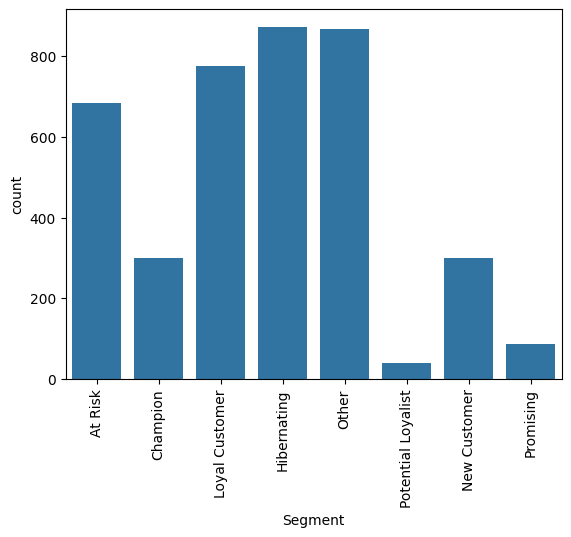

In [8]:
sns.countplot(x='Segment', data=rfm_df),
plt.xticks(rotation=90)
plt.show()

In [9]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,325,1,77183.60,1,1,5,115,At Risk
1,12747.0,2,11,4196.01,5,5,5,555,Champion
2,12748.0,0,210,33053.19,5,5,5,555,Champion
3,12749.0,3,5,4090.88,5,4,5,545,Loyal Customer
4,12820.0,3,4,942.34,5,4,4,544,Loyal Customer
